In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Pandas <br>

<img src=https://cdn.shortpixel.ai/spai/w_425+q_lossy+ret_img+to_webp/https://www.numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png><br>
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. Mainly use for data-preprocessing & data exploration. After finished pandas preprocessing, Aj.Ple really recommend to transfer data back into NumPy array format for Machine Learning Task.

### 1. Load Data

In [ ]:
import pandas as pd 

In [ ]:
# Data Frame
df = pd.read_csv('../input/bdmweek3titanic-update/titanic.txt', sep='\t', header = 0) #ถ้าไม่มี header ใช้ = None ได้
df

### 2. Access Data & Basic Functions

In [ ]:
df.columns

In [ ]:
df.values # เปลี่ยนจาก df.columns เป็น np.array

In [ ]:
df['Name']

In [ ]:
df.iloc[2,0:5] # index location เข้าไปดูแบบ np
#ดูข้อมูลแถว 2 ตั้งแต่ คอลลัม 0 ถึง 5

In [ ]:
df.loc[2,'Passenger Class':'Age'] # location เข้าไปดูแบบ pd
#ดูข้อมูลแถว 2 ตั้งแต่ Passenger Class ถึง Age

In [ ]:
df.dtypes
# load มาแล้วแปลง type อัติโนมัติ ข้อมูลปนกันได้
# ถ้าเป็น np จะเป็น string ทั้งหมด

In [ ]:
df['Age'].max()

In [ ]:
import numpy as np
np.argmax(df['Age'])

In [ ]:

df['Age'].min()

In [ ]:
df[df['Age']==df['Age'].min()]
# ดูอายุ ที่ อายุ == อายุที่น้อยที่สุด

In [ ]:

df['Name'][df['Age']==df['Age'].max()]

In [ ]:
df.shape
#ดูขนาด กันลืม

In [ ]:
df['Sex'] 
# ข้อมูลแบบ Series

In [ ]:
df['Sex'].tolist()
# เปลี่ยนข้อมูลเป็น ข้อมูลแบบ List

In [ ]:
df.values

--------------

In [ ]:
df.columns

--------------

In [ ]:
df['Label'] = df['Age'] >= 20
#มีฉลาก (Label) ต่อท้าย บอกว่าข้อมูลคนนั้นอายุมากกว่าเทท่ากับ20
df

### 3. Check Missing Values

In [ ]:
df.isnull()
# หาว่าข้อมูลไหนว่าง

In [ ]:
df.isnull().any()
# .any จะบอกว่า column ไหนมีค่าว่าง ปนอยู่

In [ ]:
df['Age'].isnull().sum()
# หาว่ามีค่าว่างกี่ข้อมูล

In [ ]:
df['Passenger Fare'].isnull().sum()

In [ ]:
df['Cabin'].isnull().sum()

### 4. Remove Values

In [ ]:
df_clean = df # เอา df ไปใส่ใน df_clean ก่อน กันพัง
df_clean = df_clean.drop('Cabin',1) # 1คือ คอลลัม 0คือแถว
df_clean = df_clean.drop('Ticket Number',1)
df_clean.columns

In [ ]:
df_clean = df_clean.dropna(1,'any')
# any คือ ถ้า 1=คอลลัม ไหนมีค่าว่างลบทั้งหมด

In [ ]:
df_clean = df_clean.dropna(0,'any')
# any คือ ถ้า 0=แถว ไหนมีค่าว่างลบทั้งหมด 
# ปกติดรอบคอลลัมไปก็ไม่มีแถวว่างแล้ว แต่เอามาให้ดูเฉยๆ

In [ ]:
df_clean.isnull().any()

### 5. Replace values

In [ ]:
df_clean['Sex']

In [ ]:
df_clean['Sex'].unique()

In [ ]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F')
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

# df_clean['Sex'].replace('Female','F', inplace='True') 
# คือเปลี่ยนทันทีเลย ไม่แนะนำเพราะมันจะเร็วไป จะมึน

### 6. Replace string values to unique integers

In [ ]:
p_class, levels = pd.factorize(df_clean['Passenger Class'])
# วิธีเปลี่ยน จากตัว นส. เป็น เลขแทน แบบรวดเร็ว
# จะ .replace ทีละอันก็ได้แต่นาน

In [ ]:
p_class

In [ ]:
levels

In [ ]:
df_clean['Passenger Class'] = p_class
df_clean

In [ ]:
df_clean.dtypes

In [ ]:
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0] # เปลีี่ยนทุกอย่างตั้งแต่ข้อมูล 0 เป็นตัวเลข แล้วเอาไปใส่ ใน sex 
df_clean['Survived'] = pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

### 7. Set Index

In [ ]:
df_clean = df_clean.set_index('Name') # เปลี่ยนชื่อเป็น index
df_clean 

-----------------

In [ ]:
df_clean.loc['Turja, Miss. Anna Sofia']['Sex'] # index จะหาแบบตัวเลขไม่ได้แล้วต้องใส่ชื่อ

### 8. Cross Tab Plot

In [ ]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar')

In [ ]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='line')

### Ex. 1 Please load this Clinic data from https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv and perform preprocessing as follows :

1. Set index of data to hn numbers <br>
2. Remove missing values <br>
3. Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo <br>
4. Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)
5. Separate data into groups based on pmmet values <br>
6. for each group, randomly choose 10 data 

In [4]:
import pandas as pd 
import numpy as np

In [83]:
# Data Frame
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
 # ex.1.1 Set index of data to hn numbers
df_clean = df
df_clean = df_clean.set_index('hn')
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# ex.1.2 Remove missing values
df_clean = df_clean.dropna(0,'any') #ลบrowที่มีข้อมูลว่าง
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2450167,67,5,0.0,1.0,1,0,0.0,3.0,2.0,4.0,...,34.0,38.0,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,0.0,1.0,1,1,1.0,0.0,5.0,4.0,...,18.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3813471,42,2,0.0,0.0,1,0,0.0,3.0,2.0,4.0,...,33.0,999.0,3.0,2.7,0.0,2.0,1.0,1.0,1.0,0.0
3812935,53,1,0.0,1.0,1,0,1.0,0.0,5.0,4.0,...,17.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
#ex1.3 Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo
df_clean = df_clean.drop(['hiv', 'size', 'utmet', 'vgmet', 'surgery', 'pchemo'],1) 
df_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [93]:
#ex.14 Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)
#df_clean['age'] = df_clean[df_clean['age'] <= 40].replace(True,'Young').replace(False,'Old') -error

df_clean['age'] = (df_clean['age'] <= 20).replace(True,'Young').replace(False,'Old')
df_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [98]:
#ex.14 **V.2**
df_clean.loc[df_clean['age'] <= 20, 'age'] = 'Young'
df_clean.loc[df_clean['age'] > 20, 'age'] = 'Old'
df_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [80]:
#ex.5 Separate data into groups based on pmmet values
df_clean_gb = df_clean.groupby(['pmmet'])
df_clean_gb.describe()

parity                                               menopaus            \
       count      mean       std  min  25%  50%  75%   max    count      mean   
pmmet                                                                           
0.0    803.0  2.066002  1.259132  0.0  1.0  2.0  2.0  13.0    803.0  0.301370   
1.0    232.0  2.073276  1.233996  0.0  1.0  2.0  2.0   8.0    232.0  0.362069   

       ... pelvicme      adnmet                                               
       ...      75%  max  count      mean       std  min  25%  50%  75%  max  
pmmet  ...                                                                    
0.0    ...      0.0  3.0  803.0  0.463263  0.839833  0.0  0.0  0.0  0.0  2.0  
1.0    ...      1.0  1.0  232.0  0.331897  0.725073  0.0  0.0  0.0  0.0  2.0  

[2 rows x 120 columns]

In [128]:
#ex.6 for each group, randomly choose 10 data
df_clean_gb = df_clean.groupby(['pmmet']).sample(10)
df_clean_gb

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3040072,Old,1,0.0,0,0.0,3.0,1.0,6.0,3.0,1.0,49.0,0.0,1.0,1.0,0.0,0.0,0.0
2874783,Old,2,0.0,0,0.0,3.0,2.0,4.0,2.0,1.0,36.0,0.0,3.0,1.0,0.0,0.0,0.0
3142069,Old,3,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,18.0,2.0,2.0,0.0,0.0,0.0,0.0
2636879,Old,2,0.0,1,0.0,0.0,5.0,4.0,0.0,2.0,30.0,7.0,2.0,0.0,0.0,0.0,0.0
3151113,Old,4,0.0,0,0.0,5.0,1.0,5.0,3.0,1.0,18.0,999.0,3.0,0.0,0.0,0.0,0.0
3593475,Old,1,0.0,0,0.0,3.0,1.0,4.0,3.0,2.0,34.0,28.0,2.0,0.0,0.0,0.0,0.0
2879194,Old,1,0.0,0,0.0,3.0,1.0,6.0,3.0,1.0,34.0,14.0,3.0,0.0,0.0,0.0,0.0
3249680,Old,2,1.0,0,1.0,0.0,5.0,1.0,0.0,2.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0
3541873,Old,3,0.0,0,0.0,5.0,4.0,5.0,4.0,1.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0


In [ ]:
#df.groupby('hiv').count()
#df.groupby('hiv').mean()
#df.groupby('hiv').mean()['age']
#df.loc[:,['age','hiv']]

### Ex. 2 P Please explore this dataset and report at least 5 facts about this dataset

In [129]:
df_clean.columns

Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

<AxesSubplot:xlabel='stage'>

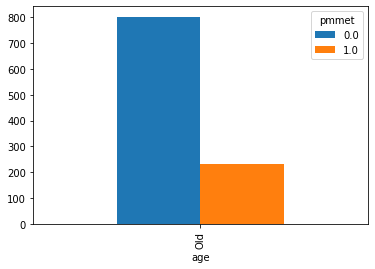

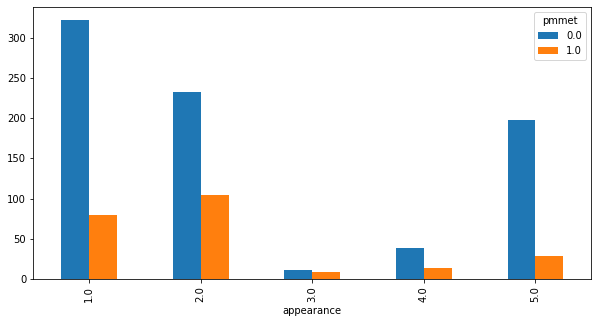

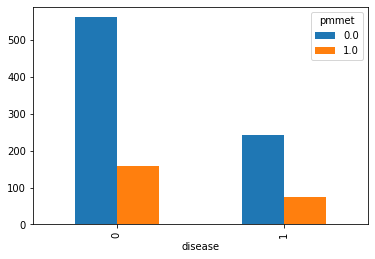

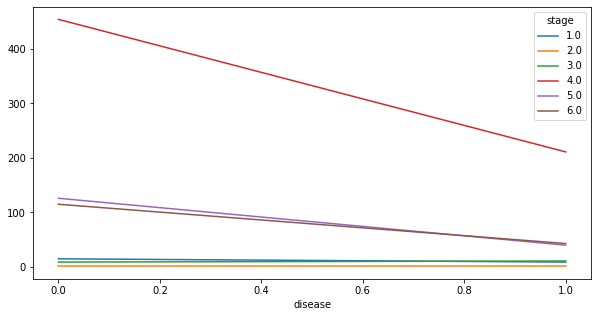

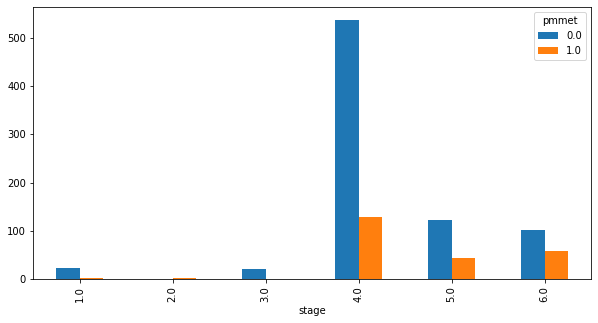

In [164]:
pd.crosstab(df_clean['age'],df_clean['pmmet']).plot(kind='bar')
pd.crosstab(df_clean['appearance'],df_clean['pmmet']).plot(kind='bar',figsize=(10,5))
pd.crosstab(df_clean['disease'],df_clean['pmmet']).plot(kind='bar')
pd.crosstab(df_clean['disease'],df_clean['stage']).plot(kind='line' ,figsize=(10,5))
pd.crosstab(df_clean['stage'],df_clean['pmmet']).plot(kind='bar',figsize=(10,5))